In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
dati_old = pd.read_csv("../Downloads/dpc-covid19-ita-andamento-nazionale.csv")
dati = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv")
dati_regioni = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv')

In [3]:
dati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 17 columns):
data                            235 non-null object
stato                           235 non-null object
ricoverati_con_sintomi          235 non-null int64
terapia_intensiva               235 non-null int64
totale_ospedalizzati            235 non-null int64
isolamento_domiciliare          235 non-null int64
totale_positivi                 235 non-null int64
variazione_totale_positivi      235 non-null int64
nuovi_positivi                  235 non-null int64
dimessi_guariti                 235 non-null int64
deceduti                        235 non-null int64
casi_da_sospetto_diagnostico    113 non-null float64
casi_da_screening               113 non-null float64
totale_casi                     235 non-null int64
tamponi                         235 non-null int64
casi_testati                    180 non-null float64
note                            44 non-null object
dtypes: float64(3), 

In [4]:
def nuoviTamponi(dati):
    # dati deve avere un attribute tamponi
    tamponi = list(dati['tamponi'])
    nuovi_tamponi = [tamponi[0]]
    for i in range(len(tamponi)-1):
        nuovi_tamponi.append(tamponi[i+1]-tamponi[i])
    return pd.Series(nuovi_tamponi)

def delta(dati,feature):
    # dati deve avere un attribute tamponi
    tamponi = list(dati[feature])
    nuovi_tamponi = [tamponi[0]]
    for i in range(len(tamponi)-1):
        nuovi_tamponi.append(tamponi[i+1]-tamponi[i])
    return pd.Series(nuovi_tamponi)

def giorniPlot(giorni):
    giorni_plot = len(dati)-giorni
    if giorni_plot < 0:
        giorni_plot = 0
    return giorni_plot


def mov_avg (numbers, window_size):
    i = 0
    moving_averages = []

    while i < len(numbers) - window_size + 1:
        this_window = numbers[i : i + window_size]

        window_average = sum(this_window) / window_size
        moving_averages.append(window_average)
        i += 1
    return moving_averages
        

# calcolo i rapporti tra nuovi casi e nuovi tamponi
ratio_old = dati_old['nuovi_positivi']/nuoviTamponi(dati_old)
ratio = dati['nuovi_positivi']/nuoviTamponi(dati)


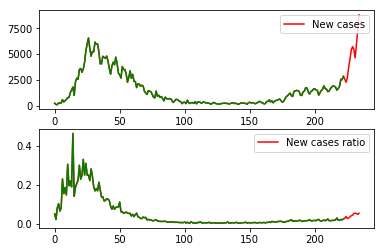

In [5]:

fig2, (ax2, ax3) = plt.subplots(nrows=2, ncols=1) # two axes on figure
ax2.plot(dati['nuovi_positivi'][giorniPlot(400):],'r',label='New cases')
ax2.plot(dati_old['nuovi_positivi'][giorniPlot(400):],'g', label='')
ax3.plot(ratio[giorniPlot(400):],'r',label='New cases ratio')
ax3.plot(ratio_old[giorniPlot(400):],'g')
ax3.legend(loc="upper right")
ax2.legend(loc="upper right")
plt.savefig('images/covid_comparison_all_time.png', dpi=400)


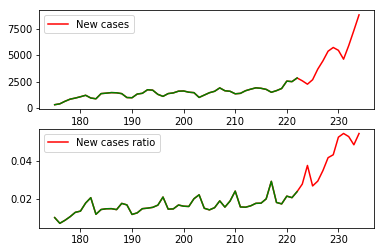

In [6]:

fig2, (ax2, ax3) = plt.subplots(nrows=2, ncols=1) # two axes on figure
ax2.plot(dati['nuovi_positivi'][giorniPlot(60):],'r',label='New cases')
ax2.plot(dati_old['nuovi_positivi'][giorniPlot(60):],'g', label='')
ax3.plot(ratio[giorniPlot(60):],'r',label='New cases ratio')
ax3.plot(ratio_old[giorniPlot(60):],'g')
ax3.legend(loc="upper left")
ax2.legend(loc="upper left")
plt.savefig('images/covid_comparison_recent.png', dpi=400)


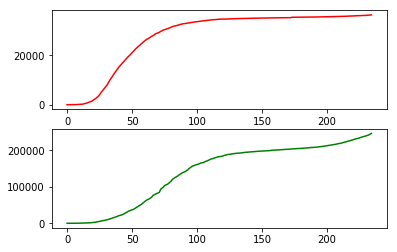

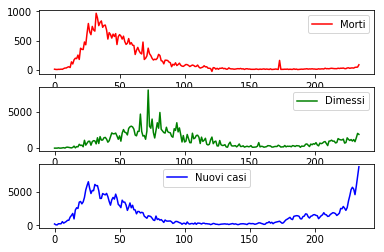

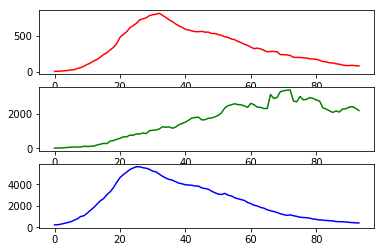

32
26


In [7]:
# morti e dimessi dall'inizio
fig2, (ax2, ax3) = plt.subplots(nrows=2, ncols=1)
ax2.plot(dati['deceduti'],'r')
ax3.plot(dati['dimessi_guariti'],'g')
plt.show()


# differenzio queste due distribuzioni 

deceduti = delta(dati,'deceduti')
dimessi = delta(dati,'dimessi_guariti')

# nuovi morti e nuovi dimessi dall'inizio
fig2, (ax2, ax3, ax4) = plt.subplots(nrows=3, ncols=1)
ax2.plot(deceduti[giorniPlot(500):],'r', label = 'Morti')
ax3.plot(dimessi[giorniPlot(500):],'g', label = 'Dimessi')
ax4.plot(dati['nuovi_positivi'][giorniPlot(500):],'b', label = 'Nuovi casi')
ax2.legend(); ax3.legend(); ax4.legend();
plt.show()



# zoom su situazione critica iniziale

fig2, (ax2, ax3, ax4) = plt.subplots(nrows=3, ncols=1)
ax2.plot(mov_avg(deceduti[:100],7),'r')
ax3.plot(mov_avg(dimessi[:100],7),'g')
ax4.plot(mov_avg(dati['nuovi_positivi'][:100],7),'b')
plt.show()
# si nota da quest'ultimo grafico che la curva dei morti ha una forma analoga a quella dei 
# nuovi casi, traslata avanti nel tempo di alcuni giorni. Calcolo quanto distano i due massimi
print(list(deceduti[:100]).index(max(deceduti[:100])))

print(list(dati['nuovi_positivi'][:100]).index(max(dati['nuovi_positivi'][:100])))

# La differenza tra i due massimi è di 6 giorni, quindi si può ipotizzare che la curva differ.
# dei deceduti sia la curva dei nuovi casi, riscalata e ritardata di 6 giorni


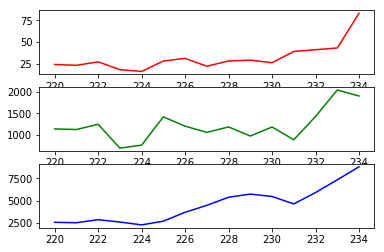

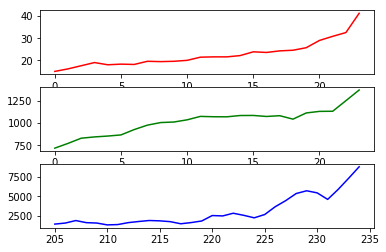

In [8]:

# nuovi morti e nuovi dimessi negli ultimi 15 giorni
fig2, (ax2, ax3, ax4) = plt.subplots(nrows=3, ncols=1)
ax2.plot(delta(dati,'deceduti')[giorniPlot(15):],'r')
ax3.plot(delta(dati,'dimessi_guariti')[giorniPlot(15):],'g')
ax4.plot(dati['nuovi_positivi'][giorniPlot(15):],'b')
plt.show()


# nuovi morti e nuovi dimessi negli ultimi 15 giorni con una moving avarage 
fig2, (ax2, ax3, ax4) = plt.subplots(nrows=3, ncols=1)
ax2.plot(mov_avg(deceduti[giorniPlot(30):],7),'r')
ax3.plot(mov_avg(dimessi[giorniPlot(30):],7),'g')
ax4.plot(dati['nuovi_positivi'][giorniPlot(30):],'b')
plt.show()


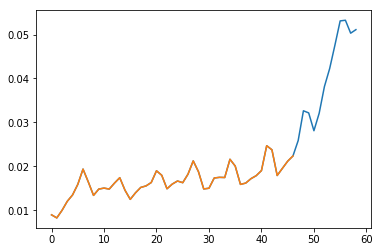

In [9]:
#nuovi casi, smooth
plt.plot(mov_avg(ratio[giorniPlot(60):],2))
plt.plot(mov_avg(ratio_old[giorniPlot(60):],2))

In [10]:
# massimo dei nuovi casi da fine luglio ad adesso
max(dati['nuovi_positivi'][150:])

8804

In [11]:
dati_regioni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4935 entries, 0 to 4934
Data columns (total 21 columns):
data                            4935 non-null object
stato                           4935 non-null object
codice_regione                  4935 non-null int64
denominazione_regione           4935 non-null object
lat                             4935 non-null float64
long                            4935 non-null float64
ricoverati_con_sintomi          4935 non-null int64
terapia_intensiva               4935 non-null int64
totale_ospedalizzati            4935 non-null int64
isolamento_domiciliare          4935 non-null int64
totale_positivi                 4935 non-null int64
variazione_totale_positivi      4935 non-null int64
nuovi_positivi                  4935 non-null int64
dimessi_guariti                 4935 non-null int64
deceduti                        4935 non-null int64
casi_da_sospetto_diagnostico    2373 non-null float64
casi_da_screening               2373 non-null float6

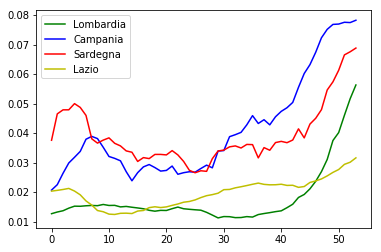

In [12]:
def ratioRegione(dati_regioni, regione):
    cond_regione = dati_regioni['denominazione_regione'] == regione
    ratio_regione = pd.Series(list(dati_regioni[cond_regione]['nuovi_positivi']))/nuoviTamponi(dati_regioni[cond_regione])
    return ratio_regione

avg_days = 7
lista_regioni = ['Lombardia', 'Campania', 'Sardegna', 'Lazio']
colors = ['g', 'b' ,'r','y']
for i in range(len(lista_regioni)):
    ratio = ratioRegione(dati_regioni, lista_regioni[i])
    plt.plot(mov_avg(ratio[giorniPlot(60):],avg_days),colors[i], label=lista_regioni[i])

    
plt.legend()
plt.savefig("images/covid_regioni.png", dpi = 300)

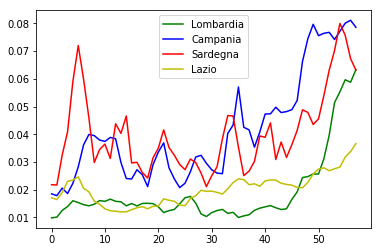

In [13]:
def ratioRegione(dati_regioni, regione):
    cond_regione = dati_regioni['denominazione_regione'] == regione
    ratio_regione = pd.Series(list(dati_regioni[cond_regione]['nuovi_positivi']))/nuoviTamponi(dati_regioni[cond_regione])
    return ratio_regione

avg_days = 3
lista_regioni = ['Lombardia', 'Campania', 'Sardegna', 'Lazio']
colors = ['g', 'b' ,'r','y']
for i in range(len(lista_regioni)):
    ratio = ratioRegione(dati_regioni, lista_regioni[i])
    plt.plot(mov_avg(ratio[giorniPlot(60):],avg_days),colors[i], label=lista_regioni[i])

    
plt.legend()
plt.savefig("images/covid_deaths.png", dpi = 300)

In [14]:
# casi in lombardia oggi
cond_data = dati_regioni['data'] ==  dati_regioni['data'][len(dati_regioni['data'])-1]
dati_oggi = dati_regioni[cond_data]
cond_regione = dati_oggi['denominazione_regione'] == 'Lombardia'
nuovi_casi = int(dati_oggi[cond_regione]['nuovi_positivi'])
nuovi_casi

2067

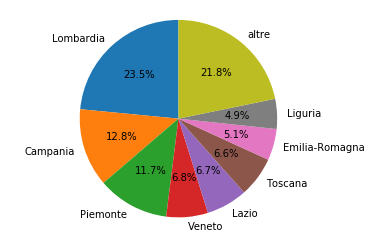

In [15]:
#regioni = ['Lombardia', 'Campania','Sardegna','Veneto','Lazio']
    
#considero solo l'ultimo giorno e riordino il dataframe in base al numero di nuovi casi

cond_data = dati_regioni['data'] == dati_regioni['data'][len(dati_regioni['data'])-1]
dati_oggi = dati_regioni[cond_data]

dati_oggi = dati_oggi.sort_values(by='nuovi_positivi', ascending=False)
#considero solo le 8 peggiori regioni 


regioni = list(dati_oggi['denominazione_regione'][:8])
regioni_tot = list(dati_oggi['denominazione_regione'].unique())


def perc_nuovi_casi_regioni(dati_regioni):
    cond_data = dati_regioni['data'] == dati_regioni['data'][len(dati_regioni['data'])-1]
    dati_oggi = dati_regioni[cond_data]
    nuovi_casi = []
    sum_tot = 0
    for regione in regioni:
        cond_regione = dati_oggi['denominazione_regione'] == regione
        nuovi_casi.append(int(dati_oggi[cond_regione]['nuovi_positivi']))
        sum_tot += int(dati_oggi[cond_regione]['nuovi_positivi'])

    #adesso sommo tutti i casi che rientreanno in 'altre regioni'  
    altre_regioni = [x for x in regioni_tot if x not in regioni ]
    sum_altre = 0
    for regione in altre_regioni:
        cond_altra = dati_oggi['denominazione_regione'] == regione
        sum_tot += int(dati_oggi[cond_altra]['nuovi_positivi'])
        sum_altre += int(dati_oggi[cond_altra]['nuovi_positivi'])
    nuovi_casi.append(sum_altre)
    
    
    for i in range(len(nuovi_casi)):
        nuovi_casi[i] = nuovi_casi[i]/sum_tot*100
        
    return nuovi_casi

   


sizes = perc_nuovi_casi_regioni(dati_regioni)
regioni.append('altre')
labels = regioni
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig('images/covid_distr.png', dpi=300)


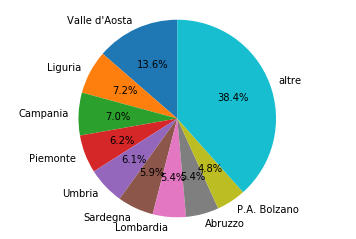

In [16]:
cond_data = dati_regioni['data'] == dati_regioni['data'][len(dati_regioni['data'])-1]
dati_oggi = dati_regioni[cond_data]

dati_oggi = dati_oggi.sort_values(by='nuovi_positivi', ascending=False)
#considero solo le 8 peggiori regioni 


regioni = list(dati_oggi['denominazione_regione'][:8])
regioni_tot = list(dati_oggi['denominazione_regione'].unique())

nuovi_tamponi_per_reg = {}
for regione in regioni_tot:
    cond_regione = dati_regioni['denominazione_regione'] == regione
    l = list(nuoviTamponi(dati_regioni[cond_regione]))
    nuovi_tamponi_per_reg[regione] = l[len(l)-1]
    


def perc_nuovi_casi_regioni(dati_regioni):
    cond_data = dati_regioni['data'] == dati_regioni['data'][len(dati_regioni['data'])-1]
    dati_oggi = dati_regioni[cond_data]
    nuovi_casi = {}
    
    for regione in regioni_tot:
        cond_regione = dati_oggi['denominazione_regione'] == regione
        valore = int(dati_oggi[cond_regione]['nuovi_positivi']) / nuovi_tamponi_per_reg[regione]
        nuovi_casi[regione] = valore
    
    ordered_nuovi_casi = {k: v for k, v in sorted(nuovi_casi.items(),reverse=True, key=lambda item: item[1])}
    regioni = list(ordered_nuovi_casi.keys())[:9]
    new_cases = list(ordered_nuovi_casi.values())[:9]
    #print(regioni, new_cases, ordered_nuovi_casi)
    sum_tot = sum(new_cases)
    
    #adesso sommo tutti i casi che rientreanno in 'altre regioni'  
    altre_regioni = [x for x in regioni_tot if x not in regioni ]
    sum_altre = 0
    for regione in altre_regioni:
        cond_regione = dati_oggi['denominazione_regione'] == regione
        valore = int(dati_oggi[cond_regione]['nuovi_positivi']) / nuovi_tamponi_per_reg[regione]
        #nuovi_casi.append(valore)
        sum_tot += valore
        sum_altre += valore
        
    new_cases.append(sum_altre)
    
    
    for i in range(len(new_cases)):
        new_cases[i] = new_cases[i]/sum_tot*100
        
    return regioni, new_cases

   


regioni, sizes = perc_nuovi_casi_regioni(dati_regioni)
regioni.append('altre')
labels = regioni
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig('images/covid_ratio_distr.png', dpi=300)
